### Data exploration and analysis :

In [1]:
import pandas as pd
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import shutil
import numpy as np

In [2]:
data = pd.read_csv("dataset/metadata.csv")
image_folder = "dataset/consolidated_dataset"
output_folder = "dataset/processed_dataset"
os.makedirs(output_folder, exist_ok=True)

print(data.head())
print(data.info())
print(data['target'].value_counts()) 

         image_name  target
0  Tr-glTr_0000.jpg  glioma
1  Tr-glTr_0001.jpg  glioma
2  Tr-glTr_0002.jpg  glioma
3  Tr-glTr_0003.jpg  glioma
4  Tr-glTr_0004.jpg  glioma
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  7023 non-null   object
 1   target      7023 non-null   object
dtypes: object(2)
memory usage: 109.9+ KB
None
target
notumor       2000
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64


In [3]:
missing_images = [img for img in data['image_name'] if not os.path.exists(os.path.join(image_folder, img))]
print(f"Nombre d'images manquantes : {len(missing_images)}")
if missing_images:
    print(f"Images manquantes : {missing_images}")

Nombre d'images manquantes : 0


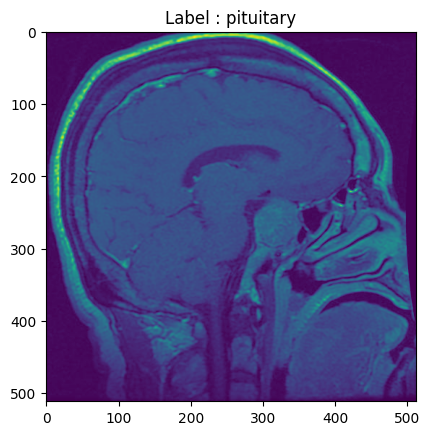

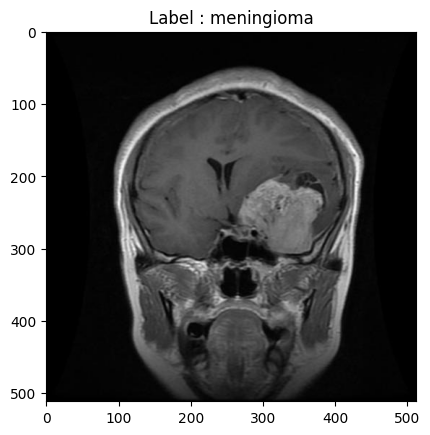

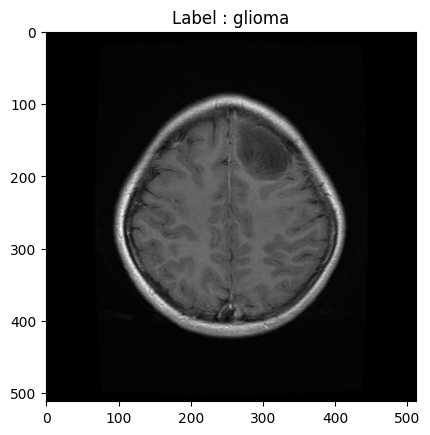

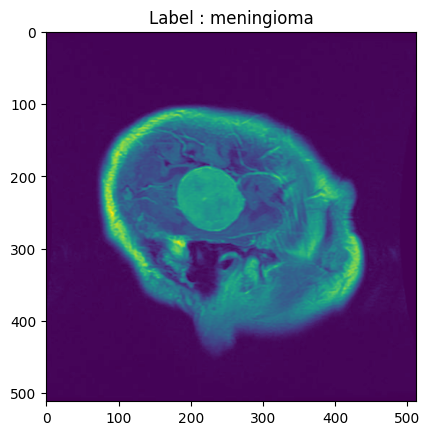

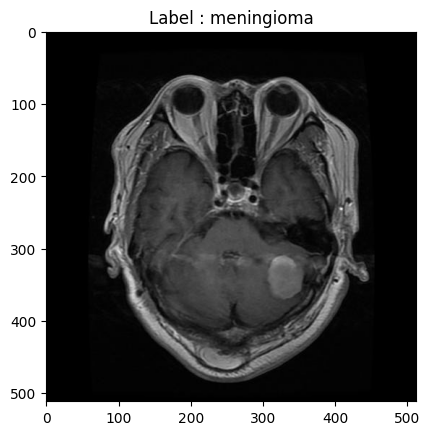

In [4]:
sample_images = data.sample(5)
for _, row in sample_images.iterrows():
    img_path = os.path.join(image_folder, row['image_name'])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Label : {row['target']}")
    plt.show()

In [5]:
image_sizes = []

for img_name in data['image_name']:
    img_path = os.path.join(image_folder, img_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

print(set(image_sizes)) 


{(491, 624), (206, 244), (409, 442), (503, 369), (430, 483), (728, 725), (201, 251), (289, 354), (554, 554), (236, 226), (214, 216), (229, 214), (733, 781), (229, 223), (235, 257), (411, 501), (329, 310), (645, 439), (434, 512), (227, 262), (528, 528), (590, 332), (209, 241), (407, 485), (630, 423), (300, 359), (236, 203), (502, 502), (236, 221), (236, 239), (550, 664), (226, 213), (411, 496), (1024, 830), (374, 456), (235, 261), (329, 314), (355, 452), (626, 686), (276, 326), (300, 345), (210, 213), (1920, 1080), (359, 449), (201, 250), (221, 228), (192, 192), (236, 216), (225, 225), (202, 223), (410, 490), (605, 613), (216, 234), (208, 248), (350, 350), (444, 506), (450, 446), (442, 442), (339, 340), (534, 674), (257, 307), (402, 396), (341, 377), (224, 219), (421, 486), (926, 649), (213, 237), (341, 395), (825, 993), (236, 220), (447, 251), (235, 233), (622, 777), (494, 600), (208, 243), (228, 221), (239, 248), (600, 605), (314, 260), (201, 249), (341, 372), (224, 223), (212, 236), 

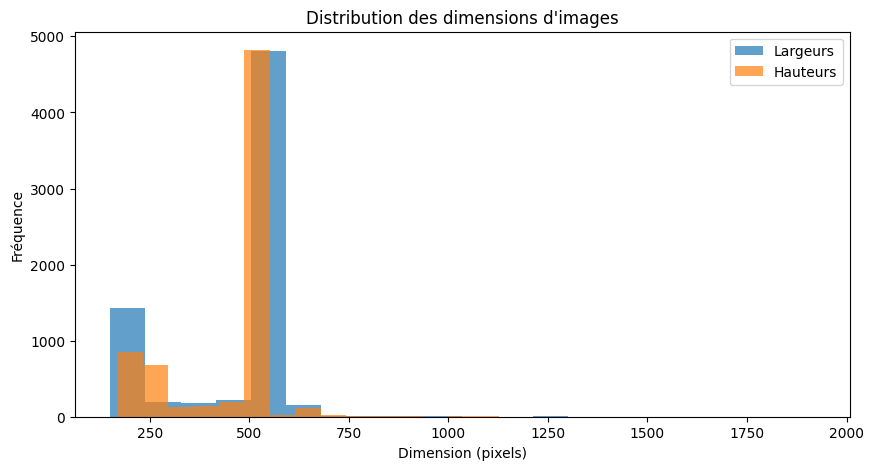

In [6]:
# Distribution des tailles d'images
widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=20, alpha=0.7, label='Largeurs')
plt.hist(heights, bins=20, alpha=0.7, label='Hauteurs')
plt.legend()
plt.title("Distribution des dimensions d'images")
plt.xlabel("Dimension (pixels)")
plt.ylabel("Fréquence")
plt.show()

In [7]:
def preprocess_image(image_path, target_size):
    try:
        # Charger l'image
        image = Image.open(image_path).convert("RGB")
    
        
        image = ImageOps.fit(image, target_size, method=Image.Resampling.LANCZOS)
        
        return image
    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_path}: {e}")
        return None

In [8]:
target_size = (128, 128)
for image_name in data['image_name']:
    image_path = os.path.join(image_folder, image_name)
    
    if os.path.exists(image_path):
        processed_image = preprocess_image(image_path, target_size)
        if processed_image:
            output_image_path = os.path.join(output_folder, image_name)
            processed_image.save(output_image_path)
            #print(f"Image sauvegardée : {output_image_path}")
    else:
        print(f"Image manquante : {image_name}")

print("Prétraitement terminé et images sauvegardées dans 'processed_dataset'.")

Prétraitement terminé et images sauvegardées dans 'processed_dataset'.


In [9]:
class_mapping = {
    'notumor': 0,
    'pituitary': 1,
    'meningioma': 2,
    'glioma': 3
}
data['target'] = data['target'].map(class_mapping)
data.to_csv("dataset/metadata_encoded.csv", index=False)
print(data.head())

         image_name  target
0  Tr-glTr_0000.jpg       3
1  Tr-glTr_0001.jpg       3
2  Tr-glTr_0002.jpg       3
3  Tr-glTr_0003.jpg       3
4  Tr-glTr_0004.jpg       3


In [10]:
class_counts = data['target'].value_counts()
print("Répartition des classes :")
print(class_counts)

Répartition des classes :
target
0    2000
1    1757
2    1645
3    1621
Name: count, dtype: int64


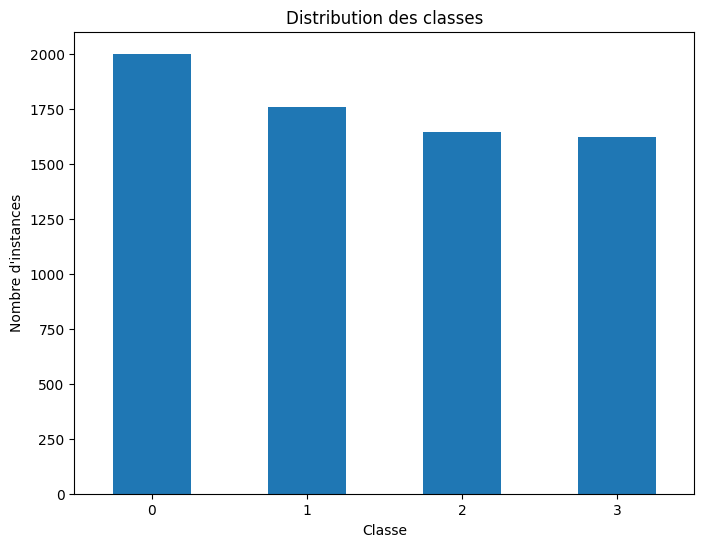

In [11]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title("Distribution des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'instances")
plt.xticks(rotation=0)
plt.show()

In [12]:
def copy_image(image_name, target_folder, source_folder):
    """
    Copie l'image du dossier source vers le dossier cible si elle n'existe pas déjà.
    
    Parameters:
    - image_name: Nom de l'image à copier.
    - target_folder: Dossier cible pour la copie.
    - source_folder: Dossier source où l'image est actuellement présente.
    """
    source_path = os.path.join(source_folder, image_name)
    target_path = os.path.join(target_folder, image_name)
    
    if not os.path.exists(target_path):
        shutil.copy(source_path, target_path)
        #print(f"Image copiée : {image_name}")
        return image_name
    else:
        print(f"Image déjà présente dans {target_folder}: {image_name}")
        return None


In [13]:
def balance_class(class_data, target_size, balanced_folder, source_folder):
    """
    Rééquilibre les images d'une classe et les copie dans le dossier cible.
    
    Parameters:
    - class_data: Données de la classe à équilibrer (DataFrame).
    - target_size: Nombre cible d'images pour cette classe.
    - balanced_folder: Dossier où les images rééquilibrées seront copiées.
    - source_folder: Dossier source où les images originales sont stockées.
    
    Retourne une liste des images copiées.
    """
    current_size = len(class_data)
    print(f"Taille actuelle de la classe : {current_size}")
    
    # Si la classe a plus d'images que souhaité, on sous-échantillonne
    if current_size > target_size:
        class_data = class_data.sample(n=target_size, random_state=42)
        print(f"Sous-échantillonnage effectué : {len(class_data)} images")
    
    # Sauvegarder les images dans le dossier de sortie
    saved_images = []
    for image_name in class_data['image_name']:
        result = copy_image(image_name, balanced_folder, source_folder)
        if result:
            saved_images.append((result, class_data['target'].iloc[0]))  
            
    return saved_images


In [14]:
balanced_folder = "dataset/balanced_dataset"
os.makedirs(balanced_folder, exist_ok=True)

# Diviser les classes et rééquilibrer chaque classe
class_0 = data[data['target'] == 0]
class_1 = data[data['target'] == 1]
class_2 = data[data['target'] == 2]
class_3 = data[data['target'] == 3]

target_size = 1621  # Nombre cible d'images par classe

balanced_images = []
balanced_images += balance_class(class_0, target_size, balanced_folder, output_folder)
balanced_images += balance_class(class_1, target_size, balanced_folder, output_folder)
balanced_images += balance_class(class_2, target_size, balanced_folder, output_folder)
balanced_images += balance_class(class_3, target_size, balanced_folder, output_folder)

balanced_df = pd.DataFrame(balanced_images, columns=['image_name', 'target'])

balanced_df.to_csv('dataset/balanced_metadata.csv', index=False)

data = balanced_df

print("Rééquilibrage terminé et images sauvegardées dans 'balanced_dataset'. Le CSV a été créé : 'balanced_metadata.csv'.")

Taille actuelle de la classe : 2000
Sous-échantillonnage effectué : 1621 images
Taille actuelle de la classe : 1757
Sous-échantillonnage effectué : 1621 images
Taille actuelle de la classe : 1645
Sous-échantillonnage effectué : 1621 images
Taille actuelle de la classe : 1621
Rééquilibrage terminé et images sauvegardées dans 'balanced_dataset'. Le CSV a été créé : 'balanced_metadata.csv'.


In [15]:
print("Répartition des classes après rééquilibrage :")
print(data['target'].value_counts())

Répartition des classes après rééquilibrage :
target
0    1621
1    1621
2    1621
3    1621
Name: count, dtype: int64


Min: 0, Max: 255
Moyenne: 48.456293098626986, Écart-type: 51.53969965805226


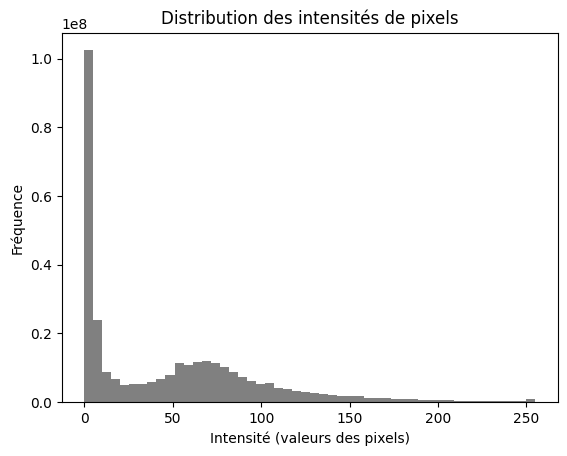

In [16]:
pixel_values = []

for img_name in data['image_name']:
    img_path = os.path.join(balanced_folder, img_name)
    with Image.open(img_path) as img:
        pixel_values.append(np.array(img).flatten())

pixel_values = np.concatenate(pixel_values)

# Statistiques sur les pixels
print(f"Min: {pixel_values.min()}, Max: {pixel_values.max()}")
print(f"Moyenne: {pixel_values.mean()}, Écart-type: {pixel_values.std()}")

# Histogramme des valeurs de pixels
plt.hist(pixel_values, bins=50, color='gray')
plt.title("Distribution des intensités de pixels")
plt.xlabel("Intensité (valeurs des pixels)")
plt.ylabel("Fréquence")
plt.show()
